In [1]:
#If th openai api key is not set already, please set it here.
import os
if 'OPENAI_API_KEY' not in os.environ:  
     os.environ['OPENAI_API_KEY'] = 'your key'


In [2]:
import matplotlib
%matplotlib widget
from amadeusgpt import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from amadeusgpt.utils import parse_result

### Set the scene number to visualize your video in a specific frame
### Make sure your animal(s) are visible on that frame so gpt-4o can configure AmadeusGPT correctly

In [3]:
scene_frame_number = 400
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/EPM_template.yaml")
config['video_info']['scene_frame_number'] = scene_frame_number
config['data_info']['data_folder'] = amadeus_root / config['data_info']['data_folder']

amadeus = AMADEUS(config)
video_file_paths = amadeus.get_video_file_paths()
print (video_file_paths)    

['/Users/shaokaiye/AmadeusGPT-dev/examples/EPM/EPM_11.mp4']


### Draw ROIs. Press Esc when you are done drawing each ROI.
### After done just run the next cell.

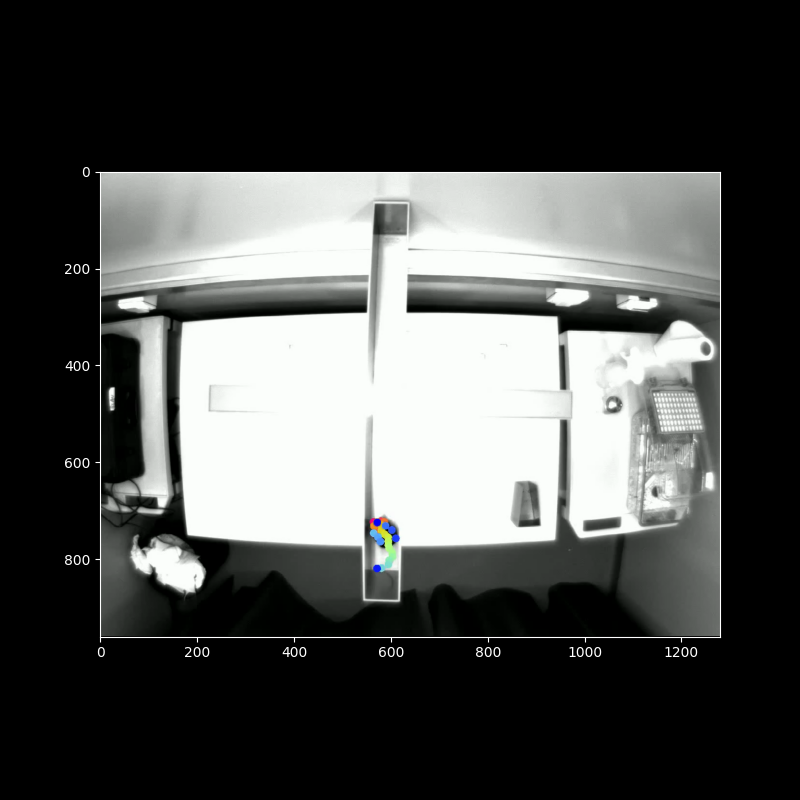

In [4]:
behavior_analysis = amadeus.get_behavior_analysis('/Users/shaokaiye/AmadeusGPT-dev/examples/EPM/EPM_11.mp4')
behavior_analysis.gui_manager.add_roi_from_video_selection()

### Get video clips, ethogram and trajectory plots for mouse in the ROI0

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0005 $
current input tokens 2524
current accumulated tokens 2750


To determine when the mouse is in ROI0, we can use the `get_animals_object_events` function from the core API. This function allows us to retrieve events that involve interactions between animals and objects, specifically for the object of interest, which in this case is ROI0.

Here is how we can write the code to capture the events when the mouse is in ROI0:

```python
def get_mouse_in_roi_events(identifier):
    '''
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    
    Returns:
    -------
    List[Event]
        A list of events where the mouse is in ROI0.
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    mouse_in_roi_events = analysis.get_animals_object_events(object_name='ROI0', query='overlap == True', bodypart_names=['mouse_center'], min_window=1, max_window=100000)
    return mouse_in_roi_events
``` 

This function will return a list of events where the mouse is detected within the specified ROI0.

{}

videos generated to defaultdict(<class 'list'>, {'/Users/shaokaiye/AmadeusGPT-dev/examples/EPM/EPM_11.mp4': ['results/EPM_11_get_mouse_in_roi_events_video_0.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_1.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_2.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_3.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_4.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_5.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_6.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_7.mp4', 'results/EPM_11_get_mouse_in_roi_events_video_8.mp4']})
Open it with media player if it does not properly display in the notebook


[<amadeusgpt.analysis_objects.event.Event object at 0x28b4c4310>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c5900>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c5ba0>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c6680>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c5b70>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c5ae0>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c5e40>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c5a50>, <amadeusgpt.analysis_objects.event.Event object at 0x28b4c6cb0>]

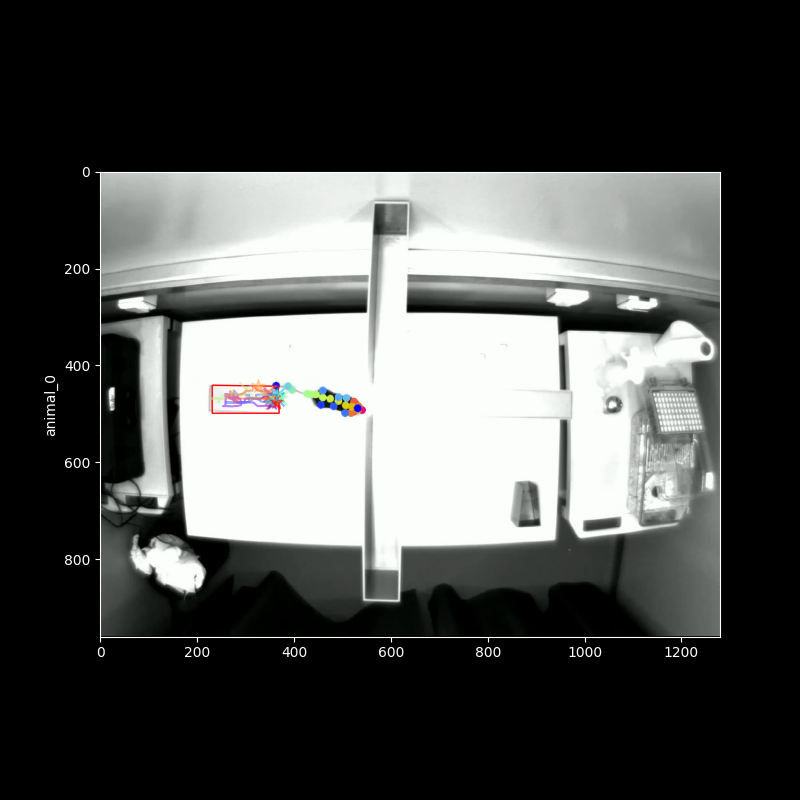

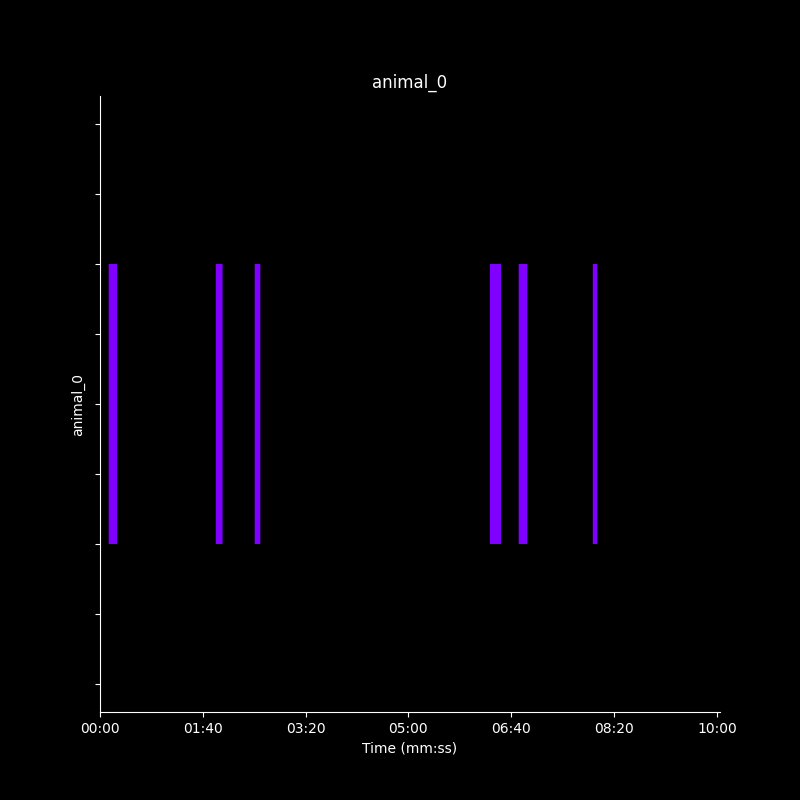

In [5]:
query = "When is the mouse in ROI0"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

### You can get a list of binary masks (equivalent to ethogram) for the underlying behavior, if your query is about retriving a described behavior

In [8]:
# the return masks is of shape (num_of_events, video_length)
# where each boolean array of (video_length,) is binary where True indicates whether the behavior is happening at that frame
masks = qa_message.get_masks()
print (masks)

{'/Users/shaokaiye/AmadeusGPT-dev/examples/EPM/EPM_11.mp4': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0013 $
current input tokens 2952
current accumulated tokens 6222


To plot the trajectory of the animal using the animal center and color it by time, we will need to retrieve the keypoints of the animal, specifically the center point (which I will assume is the 'mouse_center' based on the provided keypoints). We will then create a plot where the x-axis represents the frame number (time) and the y-axis represents the position of the animal center.

Here is how we can write the code to achieve this:

```python
def plot_animal_trajectory(identifier):
    '''
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    
    Returns:
    -------
    tuple
        A tuple containing the figure and axes of the plot.
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get the keypoints of the animal
    keypoints = analysis.get_keypoints()
    
    # Extract the coordinates of the mouse center (assumed to be the center of the animal)
    mouse_center = keypoints[:, 0, 8, :2]  # Assuming 'mouse_center' is the 9th keypoint (index 8)
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    
    # Plot the trajectory
    scatter = ax.scatter(range(mouse_center.shape[0]), mouse_center[:, 1], c=range(mouse_center.shape[0]), cmap='viridis')
    
    # Invert y-axis to match image coordinates
    ax.invert_yaxis()
    
    # Set limits to cover the whole image
    ax.set_xlim(0, 960)
    ax.set_ylim(0, 1280)
    
    # Add color bar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Time (frames)')
    
    # Set labels
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Y Coordinate of Mouse Center')
    ax.set_title('Trajectory of the Animal Center Colored by Time')
    
    return fig, ax
```

In this code:
- We retrieve the keypoints of the animal and extract the coordinates of the 'mouse_center'.
- We create a scatter plot where the x-axis represents the frame number and the y-axis represents the y-coordinate of the mouse center.
- The points are colored based on the frame number to indicate time progression.
- The y-axis is inverted to match the image coordinates, and the limits are set to cover the entire image dimensions.

{}

(<Figure size 800x800 with 2 Axes>, <Axes: title={'center': 'Trajectory of the Animal Center Colored by Time'}, xlabel='Frame Number', ylabel='Y Coordinate of Mouse Center'>)

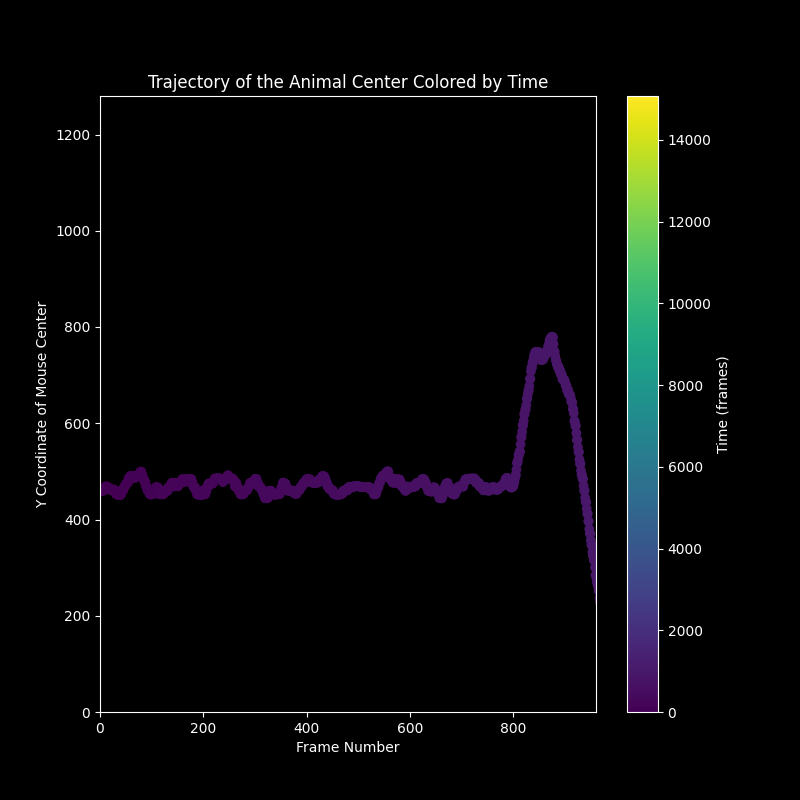

In [6]:
query = "Plot the trajectory of the animal using the animal center and color it by time"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

### How to retrieve results using the query

In [7]:
messages = amadeus.get_messages()

for query, qa_message in messages.items():
    print (query)
    print (qa_message.get_masks())

When is the mouse in ROI0
{'/Users/shaokaiye/AmadeusGPT-dev/examples/EPM/EPM_11.mp4': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
Plot the trajectory of the animal using the animal center and color it by time
{'/Users/shaokaiye/AmadeusGPT-dev/examples/EPM/EPM_11.mp4': None}
